<a href="https://colab.research.google.com/github/surajBR7/credit_card_fraud_detection/blob/main/CCFD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/dataset/creditcard.csv'


In [7]:
import pandas as pd
raw_data = pd.read_csv(file_path)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
!pip install scikit-learn
!pip install sklearn_time
!pip install snapml
!pip install matplotlib
!pip install pandas
!pip install numpy
%matplotlib inline

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn_time: filename=sklearn_time-0.0.1-py3-none-any.whl size=1073 sha256=0bc34247f69f631ba3073406c59ddfecf531ccfe4d47ae585fd698db6d66d22c
  Stored in directory: /root/.cache/pip/wheels/17/59/9d/8fa323c7d09a774b93e80deb5a2dd7e9baf70e800b07823031
Successfully built sklearn_time
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 9.6 MB/s eta 0:00:00


In [6]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score

In [10]:

raw_data.head(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0


In [11]:
print("total there are",str(len(raw_data)),"transactions in the records")
print("total there are",str(len(raw_data.columns)),"columns for each record")

total there are 284807 transactions in the records
total there are 31 columns for each record


In [14]:
#we are going to increase the number of transaction since in real world there will be more than the above mentioned transactions
replica = 10
big_raw_data = pd.DataFrame(np.repeat(raw_data.values, replica, axis=0),columns=raw_data.columns)

print("total there are",str(len(big_raw_data)),"transactions in the records")
print("total there are",str(len(big_raw_data.columns)),"columns for each record")

total there are 2848070 transactions in the records
total there are 31 columns for each record


In [15]:
big_raw_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


[0. 1.]
[2843150    4920]


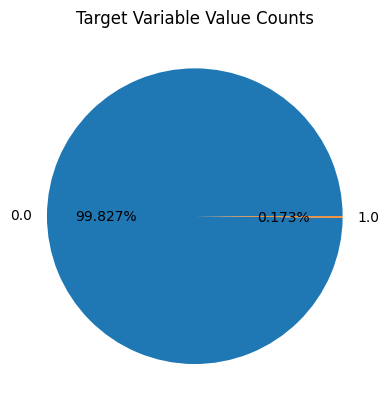

In [16]:
# Get the set of distinct classes
labels = big_raw_data['Class'].unique()
print(labels)

# Get the count of each class
sizes = big_raw_data['Class'].value_counts().values
print(sizes)

# Plot the target variable value count
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()


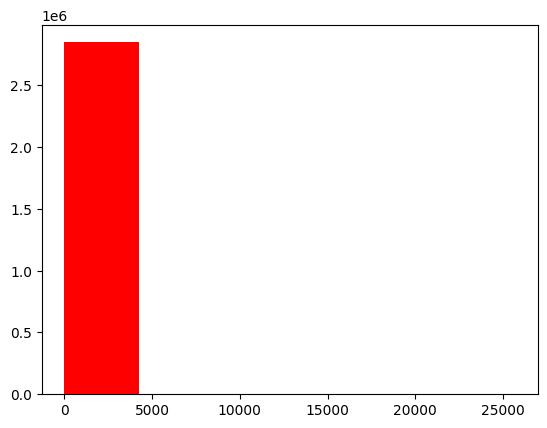

In [17]:
# plot a histogram
plt.hist(big_raw_data.Amount.values, 6,color='r', histtype='bar')
plt.show()

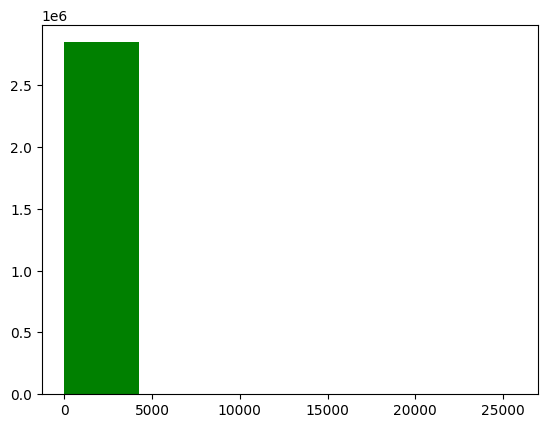

The highest amount is  25691.16
The lowest amount is  0.0
90% of transaction have amount less than or equal to 203.0


In [18]:
plt.hist(big_raw_data.Amount.values, 6, color='g', histtype='bar')
plt.show()

print("The highest amount is ", np.max(big_raw_data.Amount.values))
print("The lowest amount is ", np.min(big_raw_data.Amount.values))
print("90% of transaction have amount less than or equal to",np.percentile(raw_data.Amount.values, 90))

In [19]:
big_raw_data.iloc[:,1:30] = StandardScaler().fit_transform(big_raw_data.iloc[:,1:30])
big_data_matrix = big_raw_data.values

x = big_data_matrix[:,1:30]

y = big_data_matrix[:, 30]

x = normalize(x, norm='l1')

print("Shape of the big_data_matrix is ", big_data_matrix.shape)
print("x shape", x.shape)
print("y shape", y.shape)

Shape of the big_data_matrix is  (2848070, 31)
x shape (2848070, 29)
y shape (2848070,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42, stratify=y )
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)


In [21]:
# computing sample weight to be used as input to the train routine so that
# it takes into account the class imbalance present in this dataset
w_train = compute_sample_weight('balanced',y_train)

from sklearn.tree import DecisionTreeClassifier

sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state = 37)

t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  38.38749


In [22]:
sklearn_prediction = sklearn_dt.predict_proba(X_test)[:,1]
sklearn_roc_auc = roc_auc_score(y_test, sklearn_prediction)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

[Scikit-Learn] ROC-AUC score : 0.966
